In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats

import os, sys

project_root = '/user_data/mmhender/featsynth/'
sys.path.insert(0, os.path.join(project_root, 'code'))
from utils import stats_utils, plot_utils


In [24]:
# info about ecoset categories
ecoset_info_path = '/user_data/mmhender/stimuli/ecoset_info/'

fn = os.path.join(ecoset_info_path, 'categ_use_ecoset.npy')
info = np.load(fn, allow_pickle=True).item()

In [2]:
# load image info
image_set_name = 'images_ecoset'
image_list_filename = os.path.join(project_root, 'features','raw', '%s_list.csv'%(image_set_name))
labels = pd.read_csv(image_list_filename)

# figure out some image/category properties here
n_ims_each = np.sum(np.array(labels['basic_name'])==np.array(labels['basic_name'])[0])
basic_names = np.array(labels['basic_name'][0::n_ims_each])
super_names_long = np.array(labels['super_name'][0::n_ims_each])

n_basic = len(basic_names)
n_super = len(np.unique(super_names_long))
n_basic_each_super  = int(n_basic/n_super)
super_names = super_names_long[0::n_basic_each_super]
super_inds_long = np.repeat(np.arange(n_super), n_basic_each_super)

# more image properties to organize images
image_type_names = ['orig']
n_image_types = len(image_type_names)
cue_level_names = ['basic','super']

In [8]:
labels

,Unnamed: 0,super_name,super_index,basic_name,basic_index,image_type,exemplar_number,image_filename
0,0,insect,0,beetle,0,orig,0,/lab_data/tarrlab/common/datasets/Ecoset/train...
1,1,insect,0,beetle,0,orig,1,/lab_data/tarrlab/common/datasets/Ecoset/train...
2,2,insect,0,beetle,0,orig,2,/lab_data/tarrlab/common/datasets/Ecoset/train...
3,3,insect,0,beetle,0,orig,3,/lab_data/tarrlab/common/datasets/Ecoset/train...
4,4,insect,0,beetle,0,orig,4,/lab_data/tarrlab/common/datasets/Ecoset/train...
...,...,...,...,...,...,...,...,...
31995,31995,vehicle,7,canoe,63,orig,495,/lab_data/tarrlab/common/datasets/Ecoset/train...
31996,31996,vehicle,7,canoe,63,orig,496,/lab_data/tarrlab/common/datasets/Ecoset/train...
31997,31997,vehicle,7,canoe,63,orig,497,/lab_data/tarrlab/common/datasets/Ecoset/train...
31998,31998,vehicle,7,canoe,63,orig,498,/lab_data/tarrlab/common/datasets/Ecoset/train...


In [12]:
feat_file_name = os.path.join(project_root, 'features','gram_matrices', \
                             '%s_gram_matrices_pool1_pca.npy'%(image_set_name))
print(feat_file_name)
feat = np.load(feat_file_name)

# feat = scipy.stats.zscore(feat, axis=0)
    

/user_data/mmhender/featsynth/features/gram_matrices/images_ecoset_gram_matrices_pool1_pca.npy


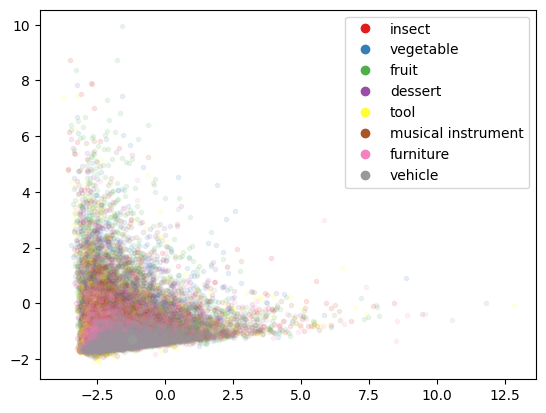

In [23]:
plt.figure()
lh = []

colors = cm.Set1(np.linspace(0,1,n_super))

for si in range(n_super):

    inds = labels['super_name']==super_names[si]

    x = feat[inds,0]
    y = feat[inds,1]

    plt.plot(x, y, '.', color=colors[si,:],alpha=0.1)
    h = plt.plot(np.mean(x),np.mean(y), 'o', color=colors[si,:]);

    lh += [h[0]]
    
plt.legend(lh, super_names)

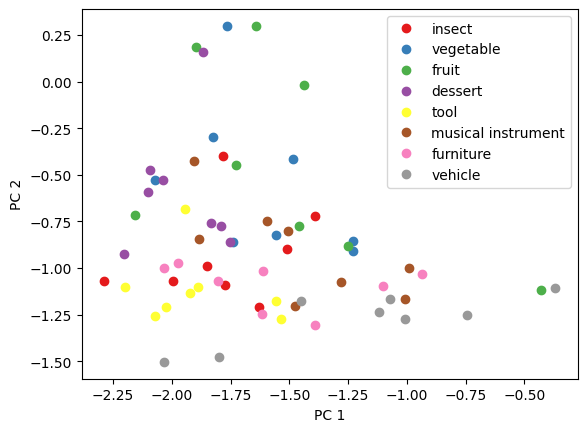

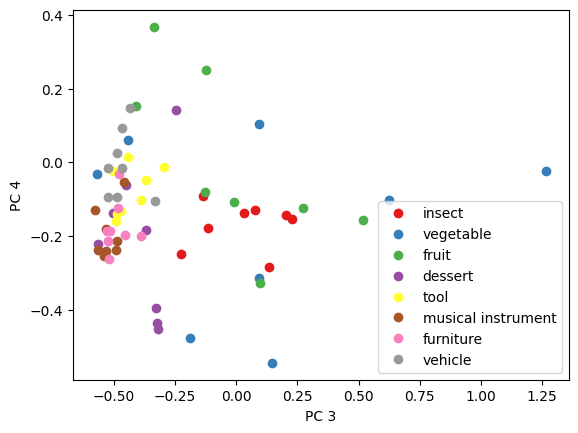

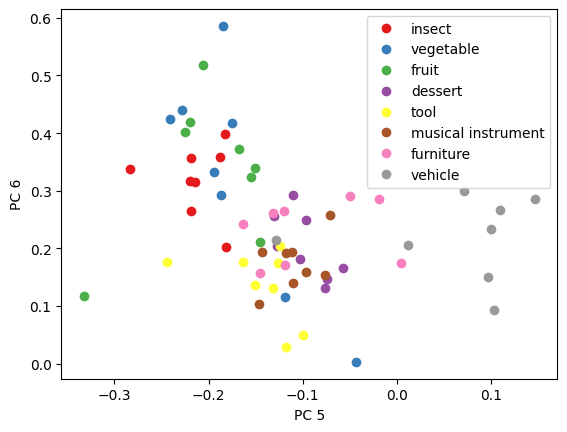

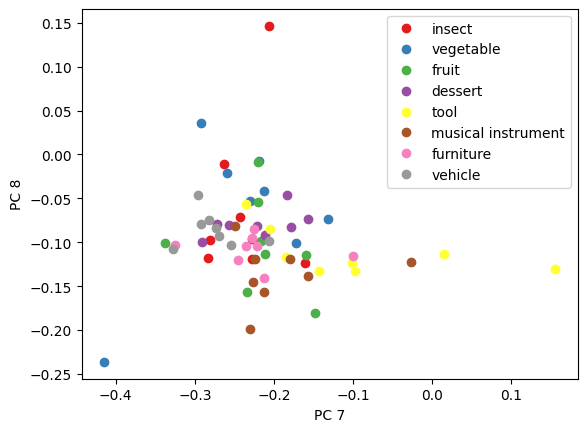

In [32]:


colors = cm.Set1(np.linspace(0,1,n_super))

for [pc1, pc2] in [[0,1],[2,3],[4,5],[6,7]]:

    plt.figure()
    lh = []
    
    for si, sname in enumerate(super_names):
        
        basic_names = info['sinfo'][sname]['basic_names']
        
        for bi, bname in enumerate(basic_names):
                
            inds = (labels['super_name']==sname) & (labels['basic_name']==bname)
        
            x = feat[inds,pc1]
            y = feat[inds,pc2]
        
            h = plt.plot(np.mean(x),np.mean(y), 'o', color=colors[si,:]);
    
            if bi==0:
                lh += [h[0]]
    
    plt.xlabel('PC %d'%(pc1+1))
    plt.ylabel('PC %d'%(pc2+1))
               
            
    plt.legend(lh, super_names)